In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from plot_helpers import *
from experiment import *
default_rcParams()
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 3

In [3]:
base_folder = '/scratch/pp2681/NEMO-data/'
ds = {}
ds['R4'] = Experiment(base_folder+'EXPR4_100')
ds['R9'] = Experiment(base_folder+'EXPR9_100')
ds['R4_neg'] = Experiment(base_folder+'EXPR4_final_negvisc')

In [4]:
for key in os.listdir(base_folder+'Reynolds'):
    ds[key] = Experiment(base_folder+'Reynolds/'+key)

In [4]:
ds.keys()

dict_keys(['R4', 'R9', 'R4_neg', 'CR_25', 'CR_35_2iter_4boundary', 'CR_35_2_iter', 'CR_25_2iter_4boundary', 'CR_20', 'CR_25_2iter', 'CR_25_3iter', 'CR_20_2iter', 'CR_30_2iter_4boundary'])

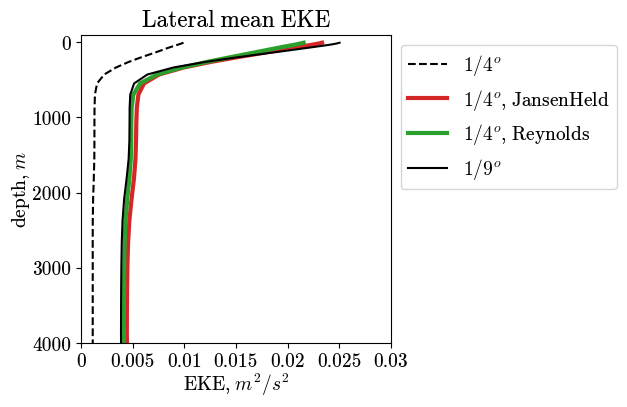

In [16]:
ds['R4'].plot_EKEz(label='$1/4^o$', color='k', ls='--')
ds['R4_neg'].plot_EKEz(label='$1/4^o$, JansenHeld', color='tab:red', lw=3)
ds['CR_30_2iter_4boundary'].plot_EKEz(label='$1/4^o$, Reynolds', color='tab:green', lw=3)
ds['R9'].plot_EKEz(label='$1/9^o$', color='k')
plt.legend(bbox_to_anchor=(1,1))

(-130000000000000.0, 50000000000000.0)

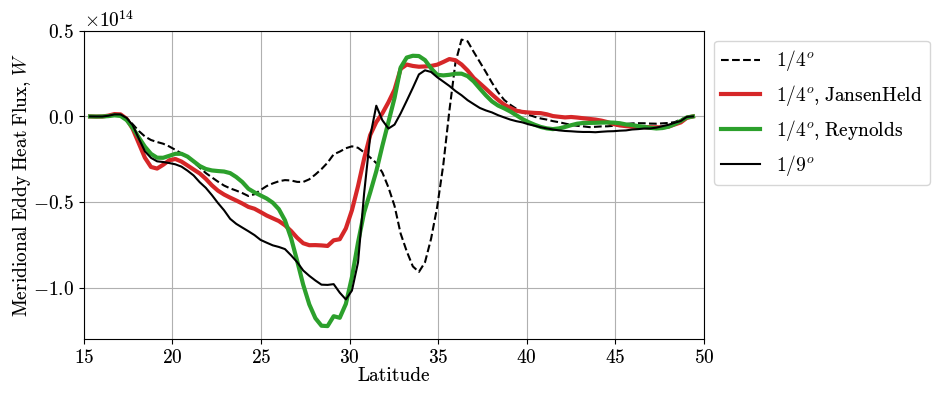

In [17]:
plt.figure(figsize=(8,4))
ds['R4'].heat_flux.plot(label='$1/4^o$', color='k', ls='--')
ds['R4_neg'].heat_flux.plot(label='$1/4^o$, JansenHeld', color='tab:red', lw=3)
ds['CR_30_2iter_4boundary'].heat_flux.plot(label='$1/4^o$, Reynolds', color='tab:green', lw=3)
ds['R9'].heat_flux.plot(label='$1/9^o$', color='k')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Latitude')
plt.ylabel('Meridional Eddy Heat Flux, $W$')
plt.grid()
plt.xlim([15,50])
plt.ylim([-1.3e+14,0.5e+14])

In [77]:
def plot_2x2(fun='plot_MOC_heat', Reynolds='CR_30_2iter_4boundary', error=False, wspace=0.4):
    plt.figure(figsize=(10,8))
    plt.subplots_adjust(wspace=wspace, hspace=0.3)
    title = ['$1/4^o$', '$1/4^o$, JansenHeld', '$1/4^o$, Reynolds', '$1/9^o$']
    for j,exp in enumerate(['R4', 'R4_neg', Reynolds, 'R9']):
        plt.subplot(2,2,j+1)
        if error and j < 3:
            getattr(ds[exp], fun)(target=ds['R9'])
            plt.title(title[j]+' (error)')
        else:
            getattr(ds[exp], fun)()
            plt.title(title[j])

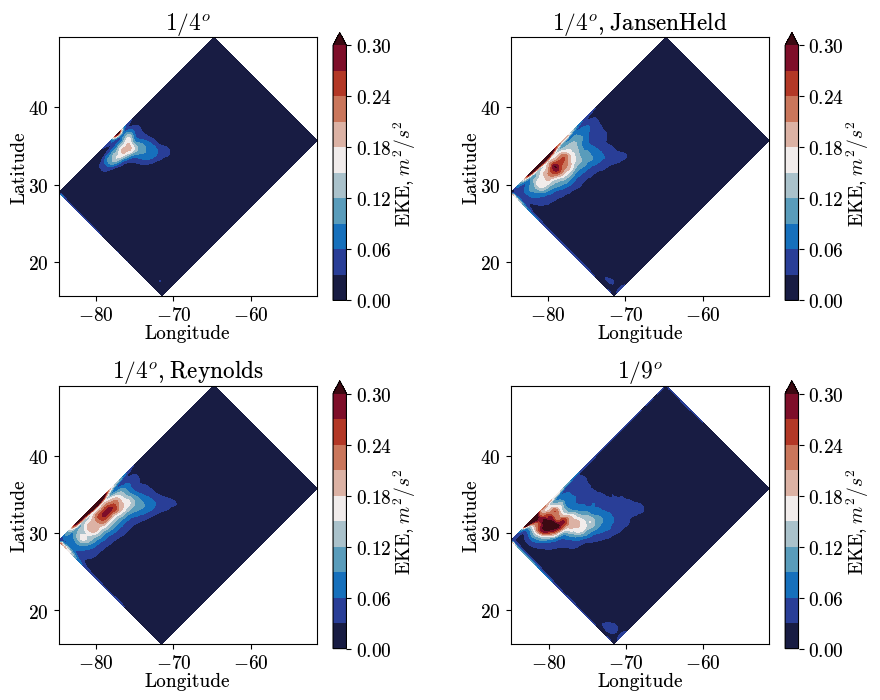

In [20]:
plot_2x2(fun='plot_EKE')

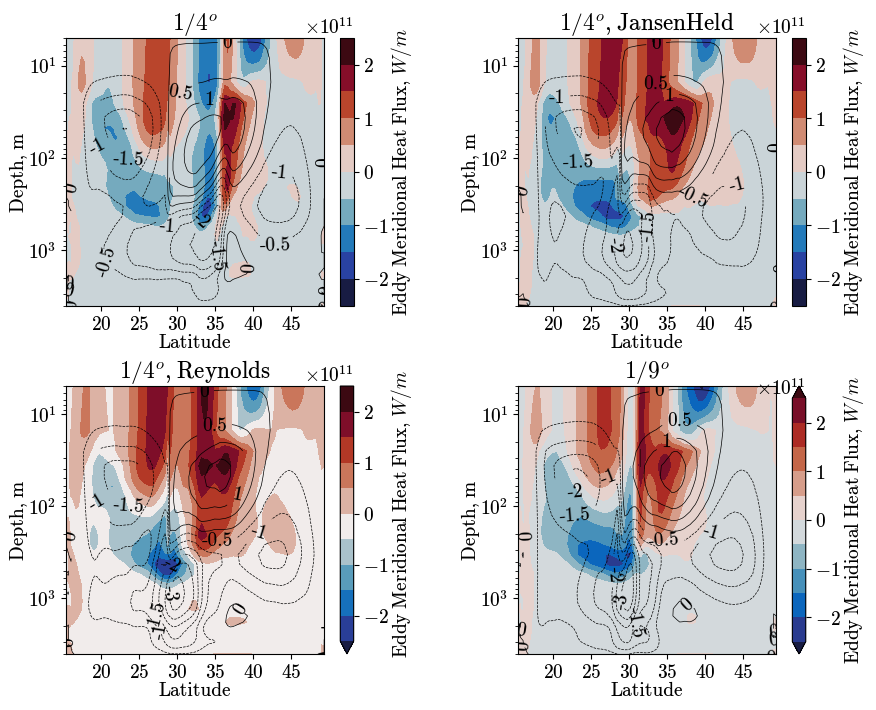

In [21]:
plot_2x2()

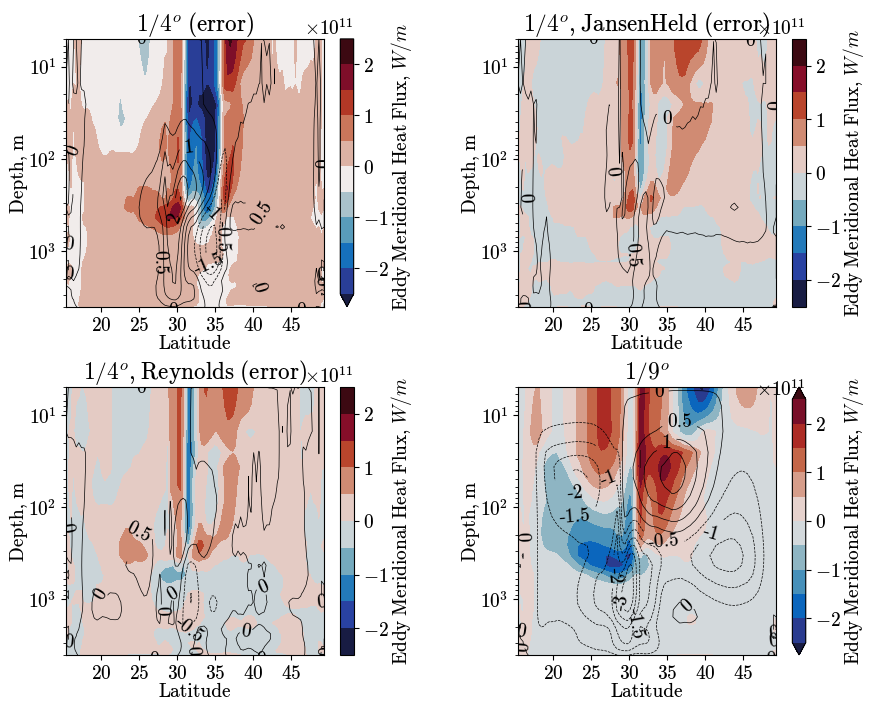

In [22]:
plot_2x2(error=True)

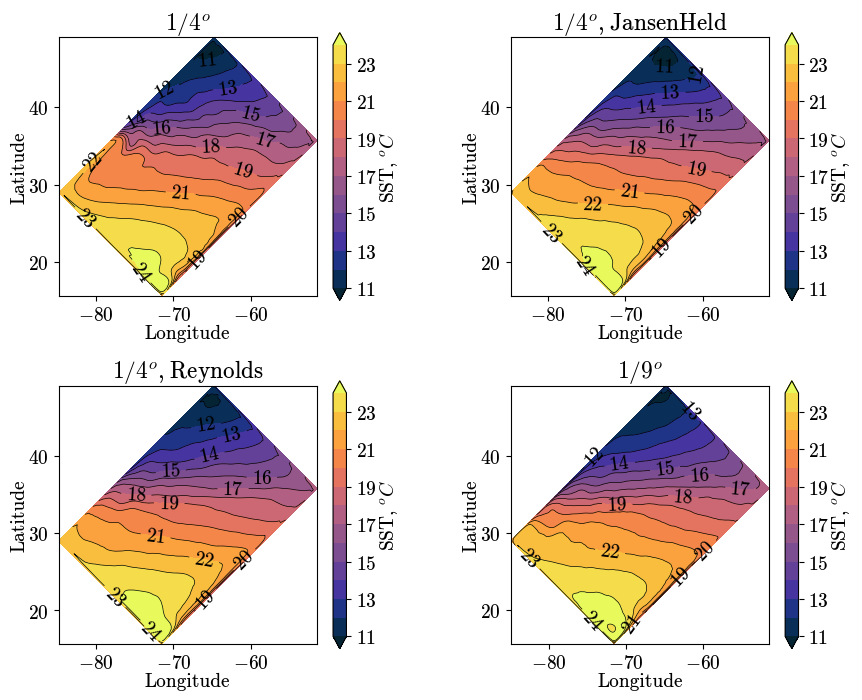

In [192]:
plot_2x2(fun='plot_SST')

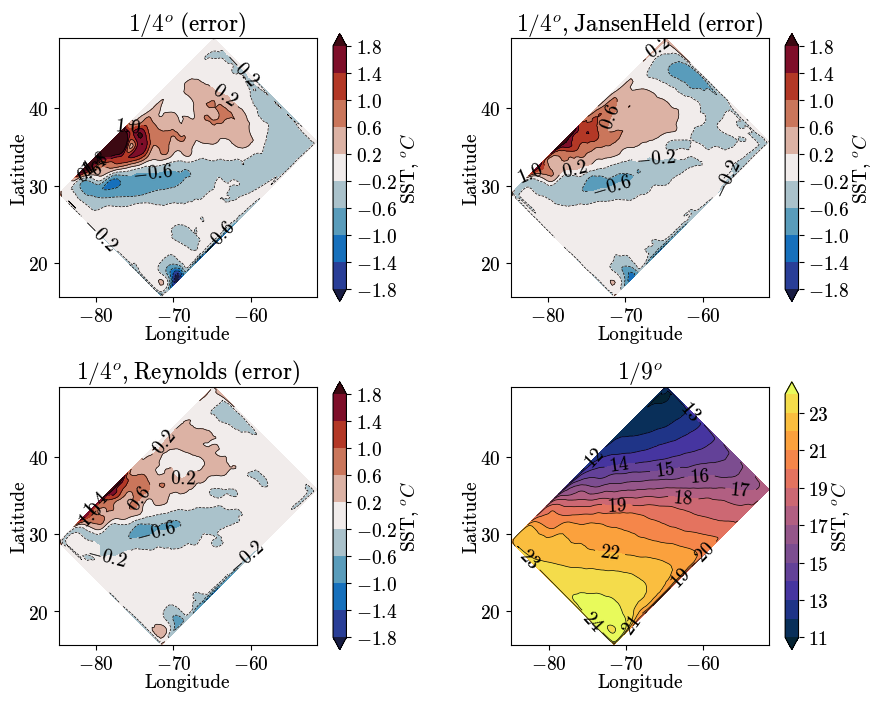

In [178]:
plot_2x2(fun='plot_SST', error=True)
plt.savefig('SST.pdf')

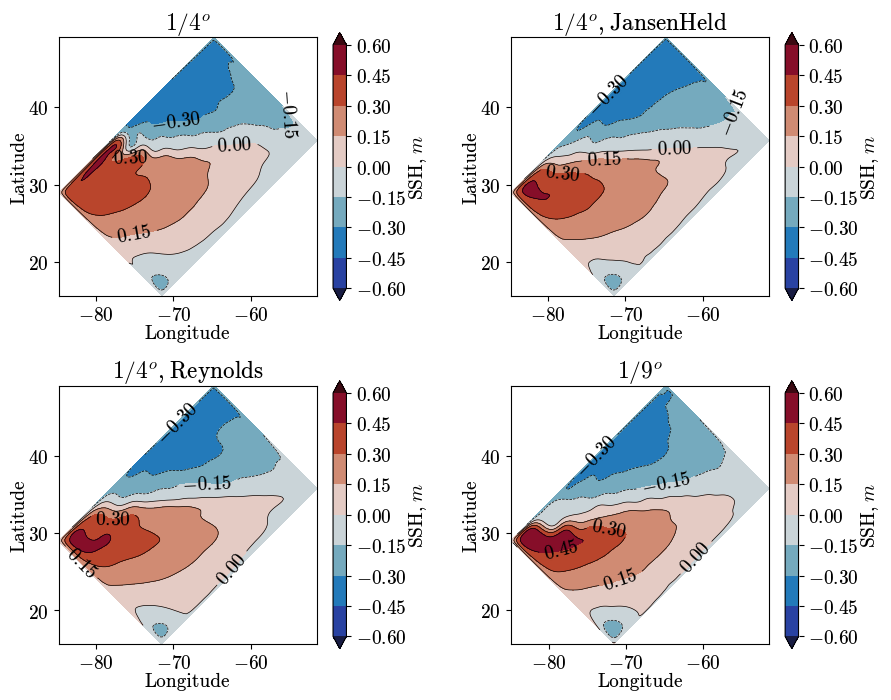

In [193]:
plot_2x2(fun='plot_SSH')

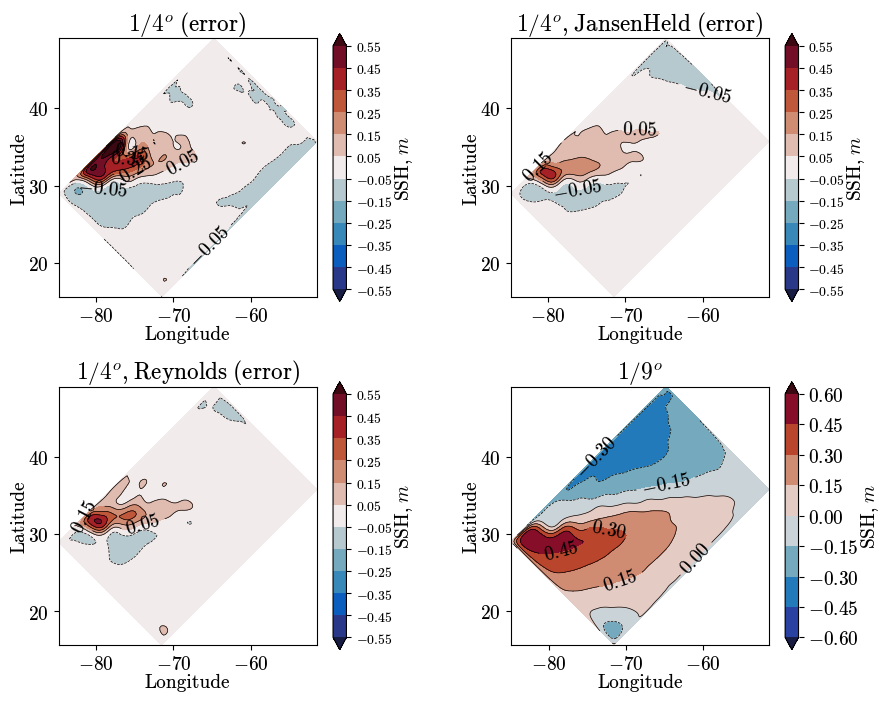

In [196]:
plot_2x2(fun='plot_SSH', error=True)

In [31]:
#plot_2x2(fun='plot_uzonal')

In [32]:
#plot_2x2(fun='plot_uzonal', error=True)

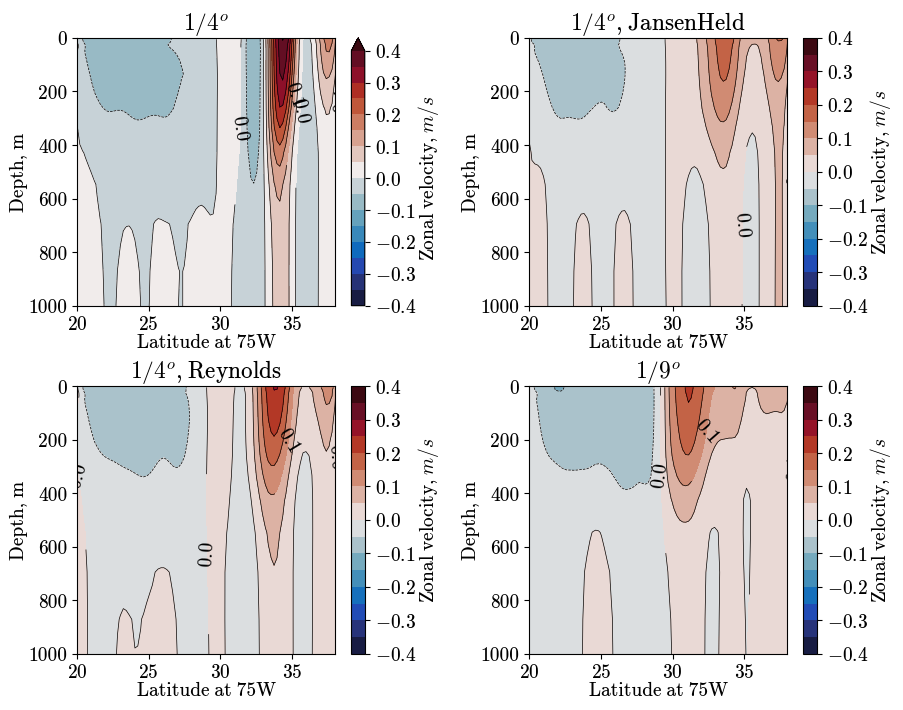

In [29]:
plot_2x2(fun='plot_uzonal_section')

In [33]:
#plot_2x2(fun='plot_uzonal_section', error=True)

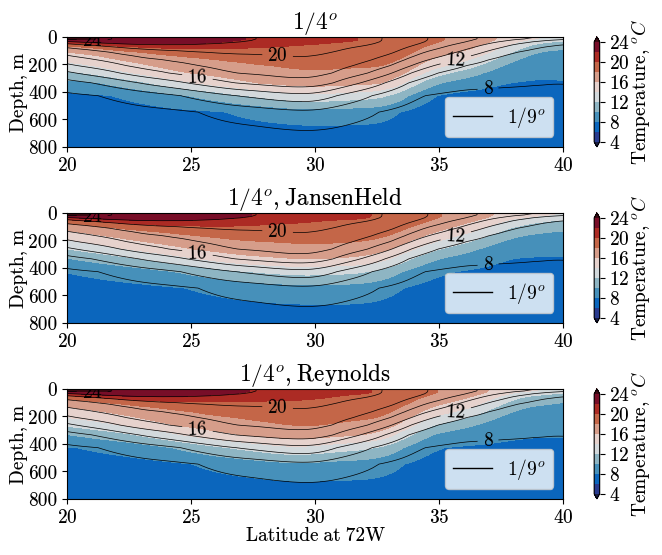

In [48]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0, hspace=0.6)
plt.subplot(3,1,1)
ds['R4'].plot_Tzonal_section(ds['R9'])
plt.xlabel('')
plt.title('$1/4^o$')
plt.subplot(3,1,2)
ds['R4_neg'].plot_Tzonal_section(ds['R9'])
plt.title('$1/4^o$, JansenHeld')
plt.xlabel('')
plt.subplot(3,1,3)
ds['CR_30_2iter_4boundary'].plot_Tzonal_section(ds['R9'])
plt.title('$1/4^o$, Reynolds')
plt.savefig('temperature_section.pdf')

In [73]:
# ds['R9'].vabs.isel(deptht=0).plot(cmap=cmocean.cm.balance, vmax=1, cbar_kwargs={'shrink': 0.6})
# plt.axvline(x=500e+3,color='k',lw=3)
# plt.axvline(x=1500e+3,color='k',lw=3)
# plt.axhline(y=1000e+3,color='k',lw=3)
# plt.axhline(y=2000e+3,color='k',lw=3)
# plt.gca().set_aspect(aspect=1)
# plt.suptitle('Box to analyze EKE spectrum')

Text(0.5, 1.0, 'Surface EKE spectrum')

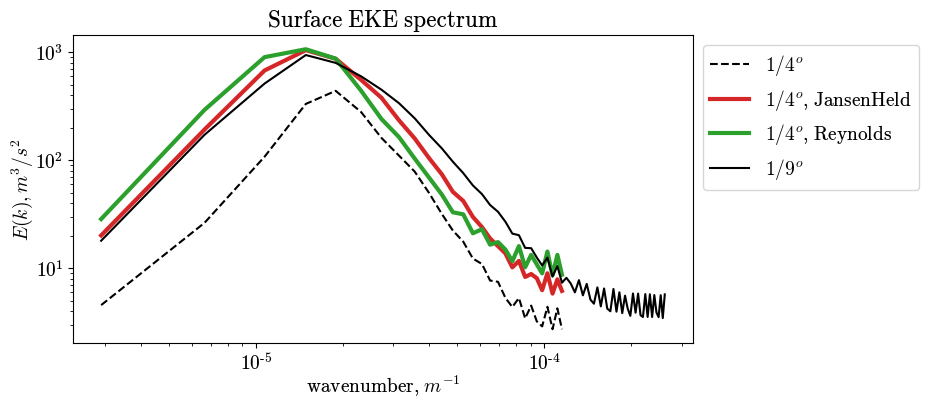

In [75]:
plt.figure(figsize=(8,4))
ds['R4'].EKE_spectrum.plot(label='$1/4^o$', color='k', ls='--')
ds['R4_neg'].EKE_spectrum.plot(label='$1/4^o$, JansenHeld', color='tab:red', lw=3)
ds['CR_30_2iter_4boundary'].EKE_spectrum.plot(label='$1/4^o$, Reynolds', color='tab:green', lw=3)
ds['R9'].EKE_spectrum.plot(label='$1/9^o$', color='k')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('wavenumber, $m^{-1}$')
plt.ylabel('$E(k), m^3/s^2$')
plt.xscale('log')
plt.yscale('log')
plt.title('Surface EKE spectrum')